In [13]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

In [14]:
#Carbon
y = {}
erry = {}


x_data = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])

x = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])
y['C_external'] = np.array([ 0.991126 , 1.00418 , 1.00028 , 0.995394 , 0.993561 , 0.988983 , 0.977285 , 0.97414 , 0.946262 , 0.953716 , 0.947673   ])
y['Pb_external'] = np.array([  1.01809 , 1.02056 , 0.997542 , 0.976127 , 0.964457 , 0.94582 , 0.921551 , 0.905278 , 0.868538 , 0.866991 , 0.867468  ])
erry['Pb_external'] =np.array([ 0.00230376 , 0.00138135 , 0.00132157 , 0.00131959 , 0.0013221 , 0.00152067 , 0.00194527 , 0.0031306 , 0.00720825 , 0.0049568 , 0.0110055   ])
erry['C_external'] = np.array([ 0.0022842 , 0.00138308 , 0.00134068 , 0.00135367 , 0.00136998 , 0.00159443 , 0.00206185 , 0.00340191 , 0.00830287 , 0.00537079 , 0.0118929  ])
y['Fe_external'] =  np.array([  1.06685 , 1.05622 , 1.03476 , 1.01331 , 1.00915 , 0.99551 , 0.980425 , 0.972824 , 0.951887 , 0.942192 , 0.941577    ])
erry['Fe_external'] = np.array([ 0.00224701 , 0.00131032 , 0.0012412 , 0.00122945 , 0.00122547 , 0.00140227 , 0.00179986 , 0.00293239 , 0.00714422 , 0.00468532 , 0.0106193])

x = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])
y['C_inclusive'] = np.array([ 1.03499 , 1.02567 , 1.01588 , 1.00856 , 0.999022 , 0.981862 , 0.969877 , 0.956686 , 0.946471 , 0.946152 , 0.939754  ])
y['Pb_inclusive'] = np.array([ 0.983714 , 0.981294 , 0.966593 , 0.948482 , 0.936177 , 0.929 , 0.895806 , 0.88369 , 0.855953 , 0.852517 , 0.843386  ])
erry['Pb_inclusive'] =np.array([ 0.00301412 , 0.00157448 , 0.00145053 , 0.00142421 , 0.00137087 , 0.00158395 , 0.0019969 , 0.00320448 , 0.00733064 , 0.00509835 , 0.0111541   ])
erry['C_inclusive'] = np.array([ 0.00307702 , 0.00160961 , 0.00149356 , 0.00147904 , 0.00143297 , 0.00165915 , 0.00212027 , 0.0035061 , 0.00851281 , 0.00553989 , 0.0121159    ])
y['Fe_inclusive'] = np.array([ 1.02088 , 1.01495 , 1.00257 , 0.98809 , 0.983875 , 0.983098 , 0.956445 , 0.955097 , 0.939578 , 0.926591 , 0.922336    ])
erry['Fe_inclusive'] = np.array([ 0.00292039 , 0.00148677 , 0.00135717 , 0.00132442 , 0.00126805 , 0.00146031 , 0.00184309 , 0.00300003 , 0.00725179 , 0.00480961 , 0.010741 ])

diff = {}
syst_total = {} 

for target in ['C','Fe','Pb']:
    y[target] = (y['%s_external'%target] + y['%s_inclusive'%target])/2.0
    erry[target] = (erry['%s_external'%target] + erry['%s_inclusive'%target])/2.0
    diff[target] = np.abs((y['%s_external'%target] - y['%s_inclusive'%target])/2.0)
    syst_total[target] = np.sqrt(np.power(diff[target],2.0) + np.power(0.025*y[target],2.0))
    print (syst_total[target])

[0.03350286 0.0275545  0.02638145 0.02589999 0.02505651 0.02489153
 0.02461975 0.02566465 0.02365939 0.02404761 0.02392278]
[0.03477562 0.03310704 0.03012637 0.02801584 0.02793483 0.02549933
 0.02701715 0.02567731 0.02443121 0.02462778 0.02520701]
[0.03035713 0.03180588 0.02902147 0.02774581 0.0276474  0.02489858
 0.02611057 0.02483091 0.02245579 0.0226795  0.02454247]


## Plot all data of three nuclei

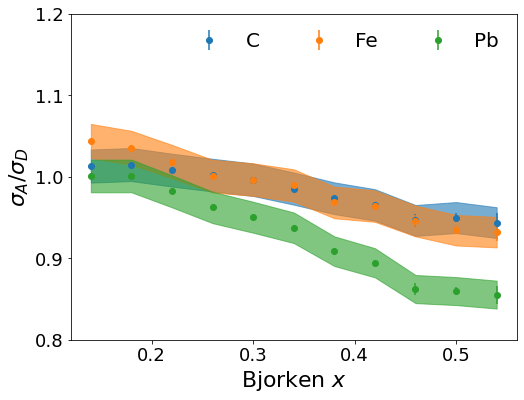

In [15]:
fig = plt.figure(figsize=(8,6))


colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'



for target in ['C','Fe','Pb']:
    plt.errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label=target)
    plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

plt.locator_params(nbins=6)
plt.ylim([0.8,1.2])
#plt.xlim([0.2,0.6])


plt.xlabel('Bjorken $x$',fontsize=22)
plt.ylabel('$\sigma_{A}/\sigma_{D}$',fontsize=22)
plt.legend(loc='best',ncol=3,frameon=False)

#plt.show()

#plt.tight_layout()
plt.savefig('EMCratio.png')


## Data from Schmookler et al.

In [16]:
import csv

y_data = {}
erry_data = {}

x_data = []
y_data['C'] = []
erry_data['C'] = []
y_data['Al'] = []
erry_data['Al'] = []
y_data['Fe'] = []
erry_data['Fe'] = []
y_data['Pb'] = []
erry_data['Pb'] = []

pdf = {}
pdf['C'] = []
pdf['Fe'] = []
pdf['Pb'] = []

errpdf_plus = {}
errpdf_minus = {}

errpdf_plus['C'] = []
errpdf_plus['Fe'] = []
errpdf_plus['Pb'] = []

errpdf_minus['C'] = []
errpdf_minus['Fe'] = []
errpdf_minus['Pb'] = []


with open('EPPSData.dta') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        #print(row)
        row = row[0].split()
        #print row[0], ' ', row[1]

       # x_data.append(row[0])
        x_data.append(float(row[0]))
        y_data['C'].append(float(row[1]))
        erry_data['C'].append(float(row[2]))
        
        pdf['C'].append(float(row[6])) 
        errpdf_minus['C'].append(float(row[7]))
        errpdf_plus['C'].append(float(row[8]))
        
        y_data['Al'].append(float(row[9]))
        erry_data['Al'].append(float(row[10]))
        
        y_data['Fe'].append(float(row[17]))
        erry_data['Fe'].append(float(row[18]))
        
        
        pdf['Fe'].append(float(row[22])) 
        errpdf_minus['Fe'].append(float(row[23]))
        errpdf_plus['Fe'].append(float(row[24]))
                
        
        y_data['Pb'].append(float(row[25]))
        erry_data['Pb'].append(float(row[26]))
        
                
        pdf['Pb'].append(float(row[30])) 
        errpdf_minus['Pb'].append(float(row[31]))
        errpdf_plus['Pb'].append(float(row[32]))
        
print ('x_data')
print (x_data)
print ('y_data')
print (y_data['C'])
print ('erry')
print (erry_data['C'])
                   

x_data
[0.22, 0.247, 0.26, 0.273, 0.287, 0.3, 0.313, 0.327, 0.34, 0.353, 0.367, 0.38, 0.393, 0.407, 0.42, 0.433, 0.447, 0.46, 0.473, 0.487, 0.5, 0.513, 0.527, 0.54, 0.553, 0.58]
y_data
[1.054, 1.032, 1.022, 1.018, 1.009, 1.005, 1.008, 1.009, 1.005, 0.9936, 0.9886, 0.9846, 0.9756, 0.9906, 0.9796, 0.9586, 0.9566, 0.9496, 0.9556, 0.9396, 0.9386, 0.9476, 0.9356, 0.9306, 0.9056, 0.9256]
erry
[0.053, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.019, 0.047]


## EPPS16 and CTEQ data sent by Hannu

In [17]:
x_pdf = [0.140,0.180,0.220,0.260, 0.300,0.340,0.380,0.420,0.460,0.500,0.540 ]
pdf = {}
pdf['C_EPPS16'] = [1.020 ,1.024, 1.021,1.014,1.005,0.993,0.981 ,0.969,0.958, 0.947,0.937]
pdf['Fe_EPPS16'] = [1.024,1.027,1.021,1.009,0.995,0.977, 0.959,0.941,0.924,0.908,0.893]
pdf['Pb_EPPS16'] = [ 1.017 , 1.018,1.007,0.990, 0.970, 0.946 ,0.922,0.899,0.876,0.855,0.835 ]

errpdf_plus = {}
errpdf_minus = {}

errpdf_plus['C_EPPS16'] = [0.024,0.018,0.018,0.019,0.019,0.018,0.017,0.016,0.016,0.016,0.017]
errpdf_plus['Fe_EPPS16'] = [0.031,0.024,0.025,0.025,0.025,0.025,0.024,0.022,0.021,0.021,0.021]
errpdf_plus['Pb_EPPS16'] = [0.040,0.034,0.035,0.036,0.036,0.036,0.034,0.036,0.038,0.040,0.040]

errpdf_minus['C_EPPS16'] = [0.025,0.022 ,0.018,0.016,0.016,0.017,0.016,0.015,0.015,0.015,0.016]
errpdf_minus['Fe_EPPS16'] = [0.035,0.030,0.022,0.020,0.019,0.017,0.016,0.016,0.015,0.015,0.015]
errpdf_minus['Pb_EPPS16'] = [0.045,0.035,0.028,0.025, 0.022,0.021,0.021,0.020 ,0.020 ,0.020 ,0.021]

for i,target in enumerate(['C_EPPS16','Fe_EPPS16','Pb_EPPS16']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])

In [18]:


pdf['Pb'] = [ 0.972,1.003,1.009,1.001,0.985,0.966,0.946,0.925,0.905,0.886,0.867]
errpdf_minus['Pb'] = [0.042, 0.036,0.033, 0.033,0.036,0.041,0.048,0.054,0.060,0.065,0.069]
errpdf_plus['Pb'] = [0.047,0.034,0.029,0.027,0.028,0.035,0.046,0.059,0.071,0.084,0.095]


pdf['Fe'] = [ 1.022,1.031,1.026,1.015,1.000,0.982,0.964,0.946,0.928,0.911,0.894]
errpdf_minus['Fe'] = [0.023,0.022,0.020,0.019,0.022,0.025,0.030,0.034,0.038,0.041,0.043]
errpdf_plus['Fe'] = [0.018,0.016,0.016,0.017,0.019,0.023,0.029,0.036,0.043,0.050,0.056]

pdf['C'] = [ 1.031, 1.032, 1.028, 1.019, 1.008, 0.995, 0.981, 0.967, 0.953, 0.938, 0.924] 
errpdf_minus['C'] = [0.019, 0.017,0.015,0.013,0.014,0.015,0.018,0.021,0.023,0.026,0.028]
errpdf_plus['C'] = [0.017,0.015,0.013,0.012,0.012,0.015,0.018,0.022,0.026,0.029,0.033]


for i,target in enumerate(['C','Fe','Pb']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])


## Comparison with Schmookler et al data

In [3]:
fig = plt.figure(figsize=(16,12))

print (len(x_data))
print (len(y_data['C']))
print (len(erry_data['C']))
print (len(y_data['Fe']))
print (len(erry_data['Fe']))
print (len(y_data['Pb']))
print (len(erry_data['Pb']))

#color_list = plt.cm.tab20c(np.linspace(0, 1, 12))


fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    axs[i].errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label='%s, Sebastian'%target)
    axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],color=colors[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    axs[i].fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.2)
    axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")
    axs[i].xaxis.set_label_text('Bjorken $x$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=15)
    axs[i].errorbar(x,y['%s_external'%target],yerr=erry[target],color='black',fmt='o',label='%s, Sebastian, old'%target)


axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
#plt.legend(loc='best',ncol=1,frameon=False,fontsize=15)
    #plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

NameError: name 'plt' is not defined

## Compared to PDF

<Figure size 1152x864 with 0 Axes>

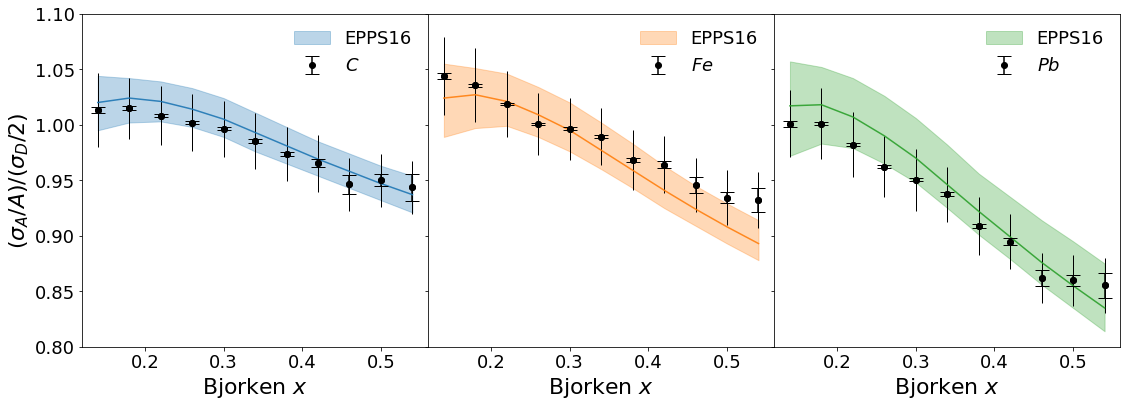

In [30]:
fig = plt.figure(figsize=(16,12))

label = {} 
label['C'] = '$C$'
label['Fe'] = '$Fe$'
label['Pb'] = '$Pb$'
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})


for i,target in enumerate(['C','Fe','Pb']):
   
    
    axs[i].fill_between(x_pdf,pdf['%s_EPPS16'%target]-errpdf_minus['%s_EPPS16'%target],pdf['%s_EPPS16'%target]+errpdf_plus['%s_EPPS16'%target],color=colors[target],alpha=0.3,label='EPPS16')#,hatch="X")    
    axs[i].plot(x_pdf,pdf['%s_EPPS16'%target],'-',color=colors[target],alpha=0.9)#,hatch="X")    
    axs[i].errorbar(x,y[target],yerr=erry[target],color='black',fmt='o',label=label[target],capsize=7,capthick=1)
    #axs[i].errorbar(x, y[target], yerr=0.03*y[target], fmt='o', color='black',  ecolor='black', elinewidth=1, capsize=0,capthick=0);
    axs[i].errorbar(x, y[target], yerr= syst_total[target], fmt='o', color='black',  ecolor='black', elinewidth=1, capsize=0,capthick=0);

    
    
    axs[i].xaxis.set_label_text('Bjorken $x$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=18)

    #axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    #axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")

#axs[0].set_title('$^{12}C$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)
#axs[1].set_title('$^{56}Fe$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)
#axs[2].set_title('$^{208}Pb$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
axs[0].set_ylim([0.8,1.1])
#axs[0].set_xlim([0.095,0.65])
#axs[0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6])
#axs[0].set_xscale('log')


plt.tight_layout()
plt.savefig('EMCratio_withEPPS16.pdf')


## Comparison with nCTEQ15

<Figure size 1152x864 with 0 Axes>

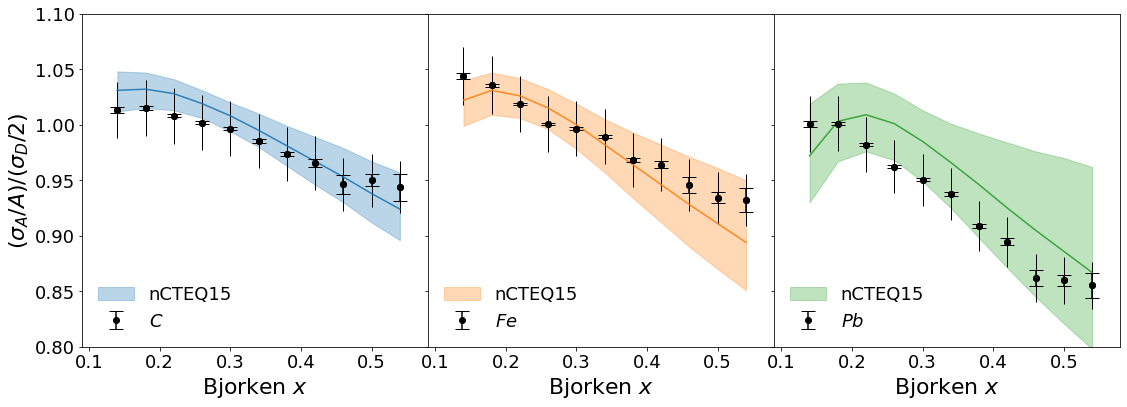

In [29]:
fig = plt.figure(figsize=(16,12))

label = {} 
label['C'] = '$C$'
label['Fe'] = '$Fe$'
label['Pb'] = '$Pb$'
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])


for i,target in enumerate(['C','Fe','Pb']):
   
    
    axs[i].fill_between(x_pdf,pdf['%s'%target]-errpdf_minus['%s'%target],pdf['%s'%target]+errpdf_plus['%s'%target],color=colors[target],alpha=0.3,label='nCTEQ15')#,hatch="X")    
    axs[i].plot(x_pdf,pdf['%s'%target],'-',color=colors[target],alpha=0.9)#,hatch="X")    
    axs[i].errorbar(x,y[target],yerr=erry[target],color='black',fmt='o',label=label[target],capsize=7,capthick=1)
    axs[i].errorbar(x, y[target], yerr=0.025*y[target], fmt='o', color='black',  ecolor='black', elinewidth=1, capsize=0,capthick=0);
    #axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    #axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")
    #axs[i].errorbar(x,y['%s_external'%target],yerr=erry[target],color='black',fmt='-',label='%s, Sebastian, external'%target)

    
    axs[i].xaxis.set_label_text('Bjorken $x$',fontsize=22)
    axs[i].legend(loc='lower left',ncol=1,frameon=False,fontsize=18)


#axs[0].set_title('$^{12}C$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)
#axs[1].set_title('$^{56}Fe$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)
#axs[2].set_title('$^{208}Pb$, $Q^{2}>1$ GeV$^{2}$, $W>$2 GeV',fontsize=19)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
axs[0].set_ylim([0.8,1.1])
axs[0].set_xlim([0.09,0.58])
axs[0].set_xticks([0.1,0.2,0.3,0.4,0.5])
#axs[0].set_xscale('log')


plt.tight_layout()
plt.savefig('EMCratio_withnCTEQ15.pdf')